In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.shape

(214, 10)

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


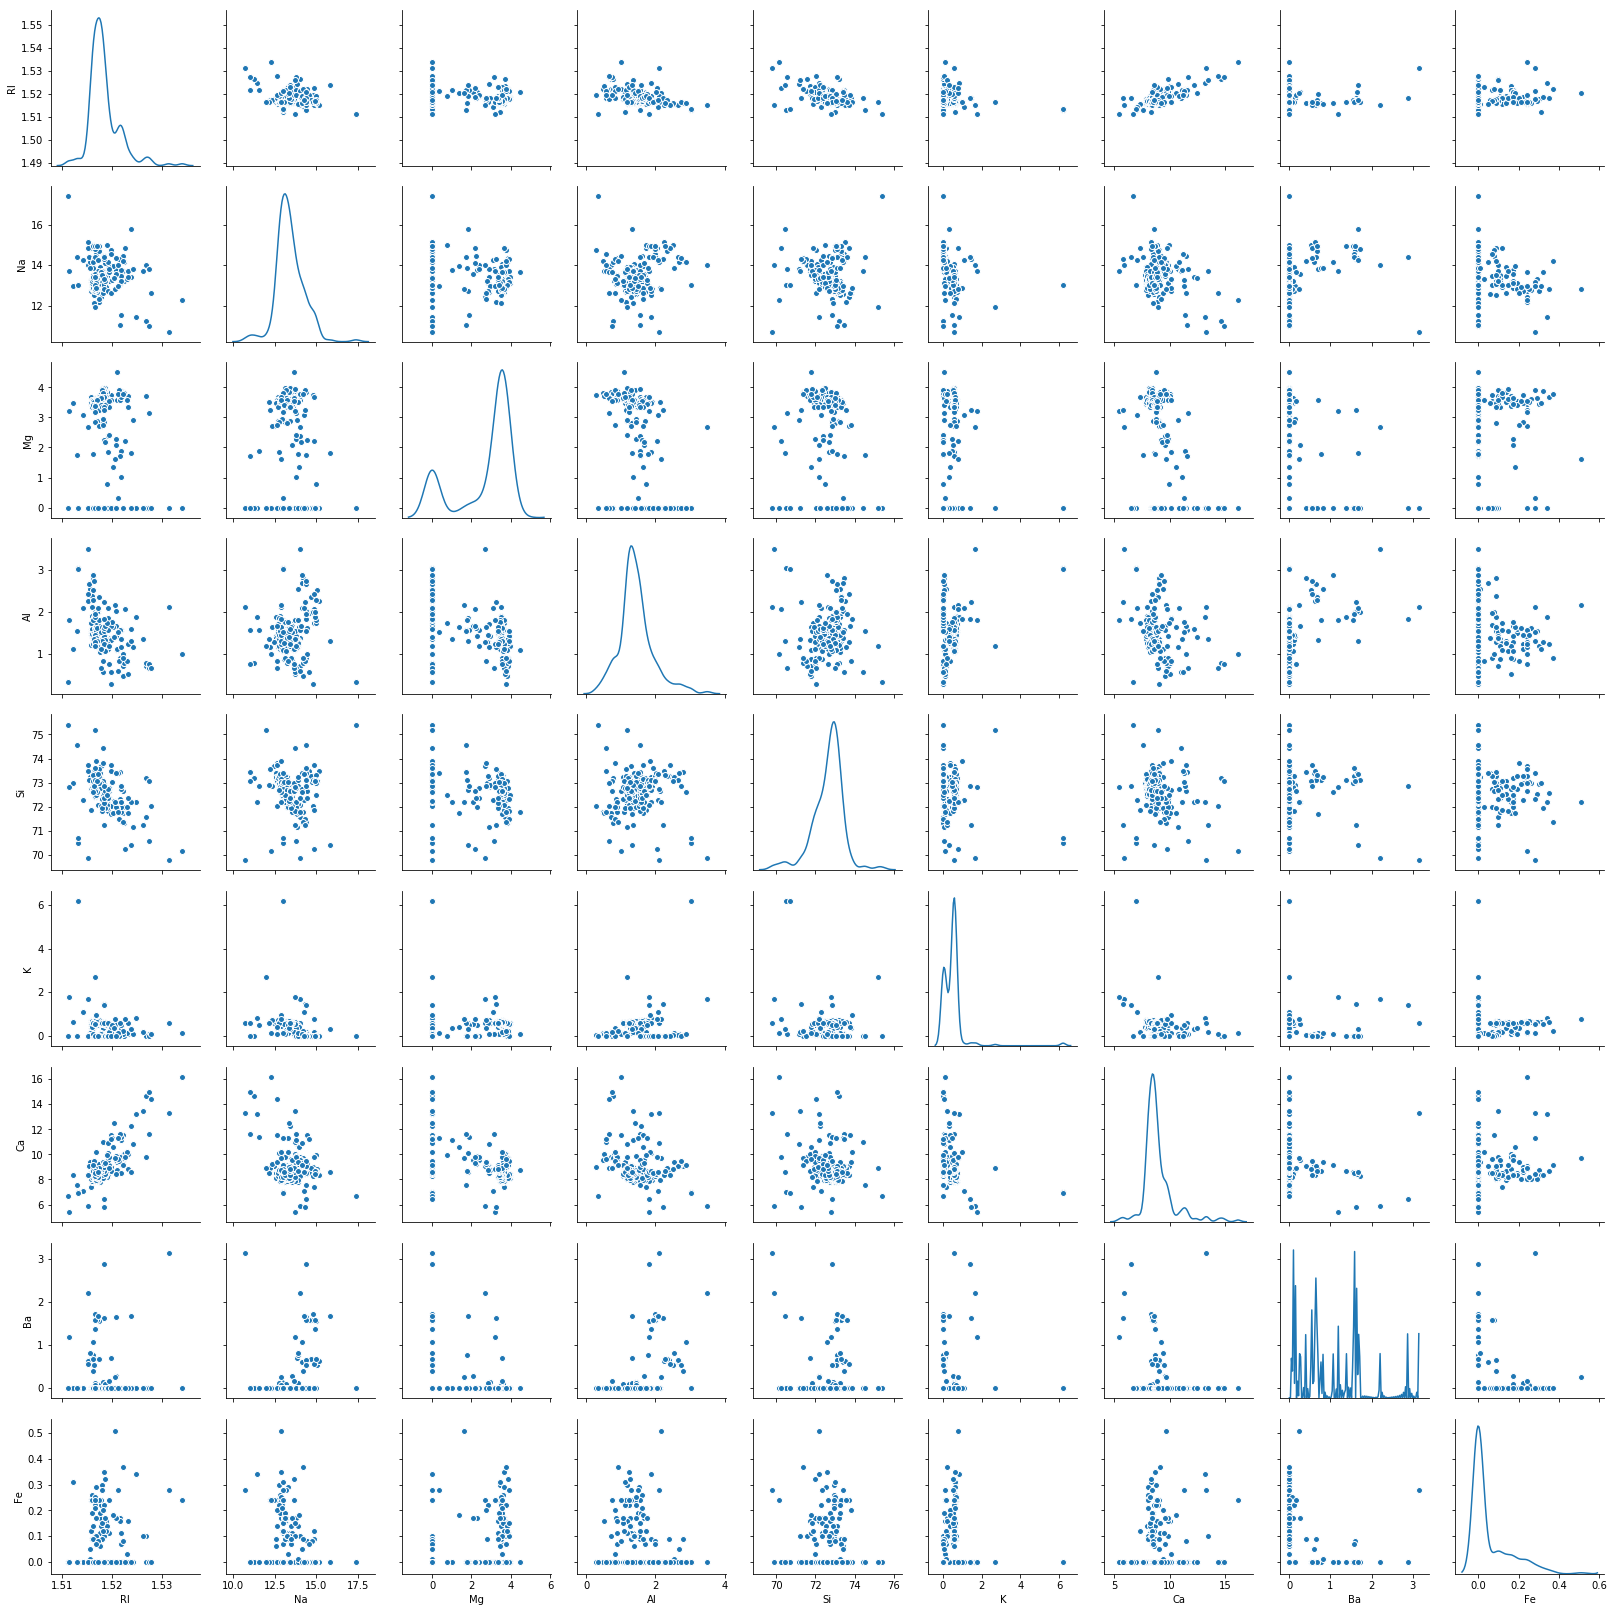

In [8]:
sns.pairplot(glass.drop(['Type'], axis=1), diag_kind='kde')
plt.show()

In [9]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [10]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

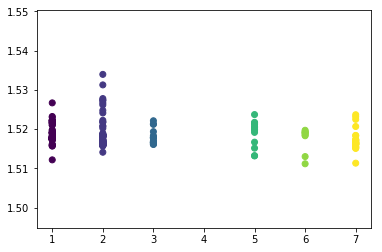

In [11]:
plt.scatter(x = 'Type', y = 'RI', c = 'Type', data = glass)

In [12]:
glass = glass.astype({'Type': 'category'})

In [13]:
glass.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type    category
dtype: object

***Treating Outliers***

In [14]:
from scipy import stats

In [15]:
z = np.abs(stats.zscore(glass.drop(['Type'], axis=1)))

In [16]:
z

array([[0.87286765, 0.28495326, 1.25463857, ..., 0.14576634, 0.35287683,
        0.5864509 ],
       [0.24933347, 0.59181718, 0.63616803, ..., 0.79373376, 0.35287683,
        0.5864509 ],
       [0.72131806, 0.14993314, 0.60142249, ..., 0.82894938, 0.35287683,
        0.5864509 ],
       ...,
       [0.75404635, 1.16872135, 1.86551055, ..., 0.36410319, 2.95320036,
        0.5864509 ],
       [0.61239854, 1.19327046, 1.86551055, ..., 0.33593069, 2.81208731,
        0.5864509 ],
       [0.41436305, 1.00915211, 1.86551055, ..., 0.23732695, 3.01367739,
        0.5864509 ]])

In [17]:
glass = glass[(z<3).all(axis=1)]

In [18]:
glass.shape

(194, 10)

***Over Sampling***

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
sm = SMOTE(k_neighbors = 5, random_state=1)

In [21]:
x = glass.drop(['Type'], axis = 1)
y = glass['Type']

In [22]:
x ,y = sm.fit_sample(x, y)

***Train - Test Split***

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [24]:
x_train.shape

(294, 9)

In [25]:
x_test.shape

(126, 9)

***Trying different models***

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
log_reg = LogisticRegression()
dtcl     = DecisionTreeClassifier()
rfcl     = RandomForestClassifier(n_estimators = 50,  random_state = 211)
bgcl     = BaggingClassifier(n_estimators=50)
gbcl     = GradientBoostingClassifier(n_estimators=50)

In [28]:
# Logistic Regression Model

print('\nLogistic Regressor')
log_reg.fit(x_train, y_train)
print('Training   : ',log_reg.score(x_train,y_train))
print('Testing   : ',log_reg.score(x_test,y_test))

# Decision Tree Classifier Model

print('\nDecision Tree Classifier')
dtlc.fit(x_train, y_train)
print('Training   : ',dtcl.score(x_train, y_train))
print('Testing : ',dtcl.score(x_test, y_test))

# Random Forest Classifier Model

print('\nRandom Forest Classifier')
rfcl.fit(x_train, y_train)
print('Training   : ',rfcl.score(x_train, y_train))
print('Testing : ',rfcl.score(x_test, y_test))

# Bagging Classifier Model

print('\nBagging Classifier')
bgcl.fit(x_train, y_train)
print('Training   : ',bgcl.score(x_train, y_train))
print('Testing : ',bgcl.score(x_test, y_test))

# Gradient Boosting Classifier Model

print('\nGradient Boosting Classifier')
gbcl.fit(x_train, y_train)
print('Training   : ',gbcl.score(x_train, y_train))
print('Testing : ',gbcl.score(x_test, y_test))


Logistic Regressor
Training   :  0.7517006802721088
Testing   :  0.7380952380952381

Decision Tree Classifier
Training   :  1.0
Testing :  0.8968253968253969

Random Forest Classifier
Training   :  1.0
Testing :  0.9444444444444444

Bagging Classifier


C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training   :  1.0
Testing :  0.9126984126984127

Gradient Boosting Classifier
Training   :  1.0
Testing :  0.9365079365079365


***Confidence Interval for different models***

In [32]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
glass_os = pd.concat((x,y), axis=1)
glass_os.shape

(420, 10)

In [34]:
from sklearn.utils import resample

values = np.asarray(glass_os, dtype='float64')  # This is already done, showing it here for ease of reference



# configure bootstrap
n_iterations = 100       # Number of bootstrap samples to create
n_size = int(len(values) * 1)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
# LogisticRegression Model
stats_log_reg = list()
for i in range(n_iterations):
    train = resample(values, n_samples = 420)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    log_reg = LogisticRegression()
    log_reg.fit(train[:,:-1], train[:,-1])
    score_log_reg = log_reg.score(test[:,:-1], test[:,-1])
    #print(score_log_reg)
    stats_log_reg.append(score_log_reg)
    
# DecisionTreeClassifier Model
stats_dtcl = list()
for i in range(n_iterations):
    #train = resample(values, n_samples = 420)
    #test = np.array([x for x in values if x.tolist() not in train.tolist()])
    dtcl = DecisionTreeClassifier()
    dtcl.fit(train[:,:-1], train[:,-1])
    score_dtcl = dtcl.score(test[:,:-1], test[:,-1])
    #print(score_dtcl)
    stats_dtcl.append(score_dtcl)
    
# RandomForestClassifier Model
stats_rfcl = list()
for i in range(n_iterations):
    #train = resample(values, n_samples = 420)
    #test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfcl = RandomForestClassifier(n_estimators=50,max_depth=5)
    rfcl.fit(train[:,:-1], train[:,-1])
    score_rfcl = rfcl.score(test[:,:-1], test[:,-1])
    #print(score_rfcl)
    stats_rfcl.append(score_rfcl)
    
# BaggingClassifier Model
stats_bgcl = list()
for i in range(n_iterations):
    #train = resample(values, n_samples = 420)
    #test = np.array([x for x in values if x.tolist() not in train.tolist()])
    bgcl = BaggingClassifier(n_estimators=50)
    bgcl.fit(train[:,:-1], train[:,-1])
    score_bgcl = bgcl.score(test[:,:-1], test[:,-1])
    #print(score_bgcl)
    stats_bgcl.append(score_bgcl)
    
# GradientBoostingClassifier Model
stats_gbcl = list()
for i in range(n_iterations):
    #train = resample(values, n_samples = 420)
    #test = np.array([x for x in values if x.tolist() not in train.tolist()])
    gbcl = GradientBoostingClassifier(n_estimators=50)
    gbcl.fit(train[:,:-1], train[:,-1])
    score_gbcl = gbcl.score(test[:,:-1], test[:,-1])
    #print(score_gbcl)
    stats_gbcl.append(score_gbcl)

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



CI for LogisticRegression Model


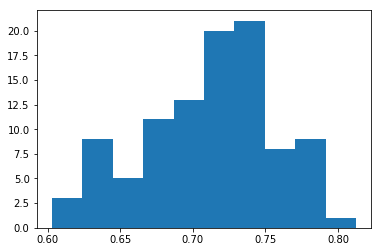

95.0 confidence interval 62.4% and 78.1%

CI for DecisionTreeClassifier Model


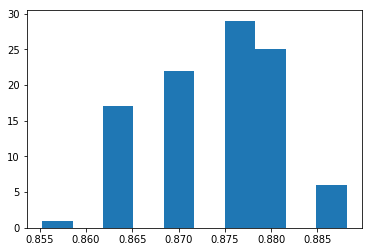

95.0 confidence interval 86.2% and 88.8%

CI for RandomForestClassifier Model


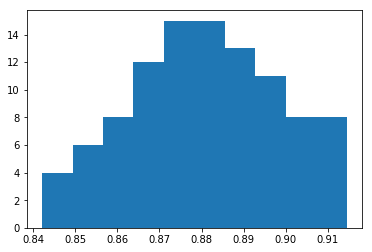

95.0 confidence interval 84.9% and 90.8%

CI for BaggingClassifier Model


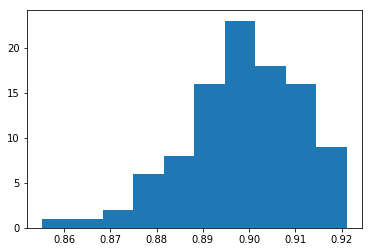

95.0 confidence interval 86.8% and 92.1%

CI for GradientBoostingClassifier Model


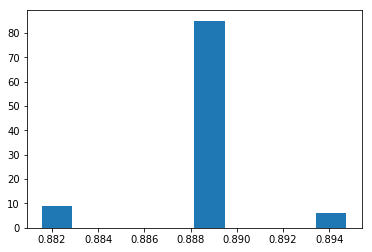

95.0 confidence interval 88.2% and 89.5%


In [36]:
# plot scores
# LogisticRegression
print('\nCI for LogisticRegression Model')
plt.hist(stats_log_reg)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_log_reg, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_log_reg, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# DecisionTreeClassifier
print('\nCI for DecisionTreeClassifier Model')
plt.hist(stats_dtcl)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_dtcl, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_dtcl, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# RandomForestClassifier
print('\nCI for RandomForestClassifier Model')
plt.hist(stats_rfcl)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_rfcl, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_rfcl, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# BaggingClassifier
print('\nCI for BaggingClassifier Model')
plt.hist(stats_bgcl)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_bgcl, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_bgcl, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# GradientBoostingClassifier
print('\nCI for GradientBoostingClassifier Model')
plt.hist(stats_gbcl)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_gbcl, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_gbcl, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [40]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [41]:
glass['RI'].skew()

0.9527325820305373